# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Data

In [2]:
data = pd.read_csv('train.csv')

In [3]:
X = data.iloc[:,2:].values
y = data['target'].values

In [4]:
collections.Counter(y)

Counter({0: 179902, 1: 20098})

0.89951 0.10048999999999997


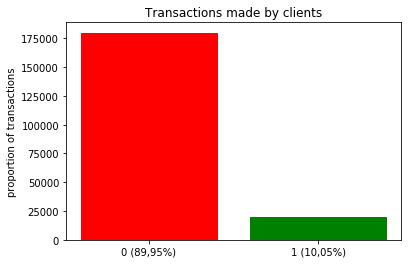

In [5]:
a=179902/(179902+20098)
b=1-a
print(a,b)

frequency = ({'0 (89,95%)':179902, '1 (10,05%)':20098})
p=plt.bar(frequency.keys(), frequency.values())

plt.ylabel('proportion of transactions')
plt.title('Transactions made by clients')

p[0].set_color('r')
p[1].set_color('g')

# Data transformation and Feature engineering

Text(0.5, 1.0, 'Distribution of means of features')

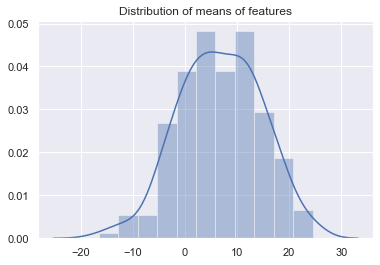

In [18]:
means=[]
for i in data.columns.values[2:202]:
    means.append(data[i].values.mean())

sns.set(color_codes=True)
sns.distplot(means).set_title('Distribution of means of features')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
X_train

array([[-0.57710174, -1.27373702,  0.45170728, ..., -0.37396811,
        -1.02639785,  0.21413482],
       [ 0.26995857, -0.62213756,  1.19036045, ..., -0.12939961,
         0.82541712,  0.50568523],
       [-0.68111341, -0.2760664 ,  0.51698836, ..., -0.69514059,
        -0.38144932,  0.35668144],
       ...,
       [ 0.17870987, -0.84546901, -0.07667568, ..., -0.20904171,
        -0.67680579,  0.72102365],
       [-0.31746727, -1.72398014,  1.09630117, ...,  1.22180338,
        -0.11352617, -1.01298853],
       [ 0.06456676, -1.00810962,  0.53130173, ..., -0.78389704,
        -1.24290845,  0.33196403]])

# First models tried

In [9]:
models = {
          'LogisticRegression' : LogisticRegression(),
          #'KNeighborsClassifier': KNeighborsClassifier()
          #'SVM' : SVC(kernel = 'linear', verbose=True),
          #'Kernel SVM' : SVC(kernel = 'rbf', verbose=True),
          'Naive Bayes' : GaussianNB(),
          'Decision Tree' : DecisionTreeClassifier(criterion = 'entropy'),
          'Random Forest' : RandomForestClassifier(n_estimators = 20, verbose=True)}

LogisticRegression :
Naive Bayes :
Logistic Regression : 0.91265
Naive Bayes 0.9194333333333333


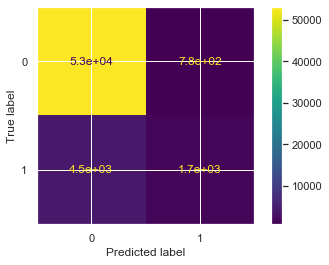

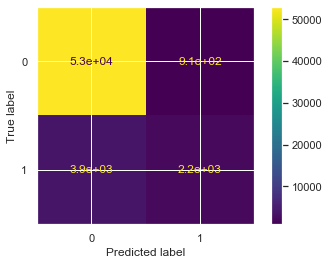

In [10]:
scores = []
i=0
for model in models.keys(): 
    classifier = models[model]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    conf_mat = plot_confusion_matrix(classifier, X_test, y_test, labels=[0,1])
    print(model, ':', scores[i])
    print(conf_mat)
    i+=1

In [42]:
model_GBM = GradientBoostingClassifier(verbose=2)
model_GBM.fit(X_train, y_train)
y_pred_GBM = model_GBM.predict(X_test)    
score_GBM = accuracy_score(y_test, y_pred_GBM)
print(f"Accuracy: {score_GBM* 100:.2f}%")

      Iter       Train Loss   Remaining Time 
         1           0.6473           43.32m
         2           0.6436           43.94m
         3           0.6405           43.37m
         4           0.6374           43.49m
         5           0.6346           43.05m
         6           0.6320           43.00m
         7           0.6295           42.24m
         8           0.6272           41.60m
         9           0.6248           41.28m
        10           0.6226           41.46m
        11           0.6205           40.95m
        12           0.6183           40.47m
        13           0.6162           40.17m
        14           0.6142           39.92m
        15           0.6122           40.03m
        16           0.6103           39.87m
        17           0.6083           39.63m
        18           0.6065           39.15m
        19           0.6045           37.76m
        20           0.6029           36.45m
        21           0.6011           35.25m
        2

ValueError: Found input variables with inconsistent numbers of samples: [20000, 200000]

In [11]:
conf_mat_GBM = confusion_matrix(y_test, y_pred_GBM, labels=[0,1])

array([[53855,    31],
       [ 5910,   204]], dtype=int64)

In [7]:
MLP = MLPClassifier(verbose=True)
MLP.fit(X_train, y_train)

Iteration 1, loss = 0.27962998
Iteration 2, loss = 0.23649906
Iteration 3, loss = 0.22753833
Iteration 4, loss = 0.22086899
Iteration 5, loss = 0.21404869
Iteration 6, loss = 0.20654862
Iteration 7, loss = 0.19976107
Iteration 8, loss = 0.19329478
Iteration 9, loss = 0.18758654
Iteration 10, loss = 0.18264303
Iteration 11, loss = 0.17833980
Iteration 12, loss = 0.17504075
Iteration 13, loss = 0.17145626
Iteration 14, loss = 0.16843366
Iteration 15, loss = 0.16526745
Iteration 16, loss = 0.16316842
Iteration 17, loss = 0.16052698
Iteration 18, loss = 0.15901830
Iteration 19, loss = 0.15678956
Iteration 20, loss = 0.15529839
Iteration 21, loss = 0.15391911
Iteration 22, loss = 0.15218865
Iteration 23, loss = 0.15032577
Iteration 24, loss = 0.14898248
Iteration 25, loss = 0.14769557
Iteration 26, loss = 0.14626889
Iteration 27, loss = 0.14535448
Iteration 28, loss = 0.14406576
Iteration 29, loss = 0.14287087
Iteration 30, loss = 0.14226207
Iteration 31, loss = 0.14078655
Iteration 32, los

C:\Users\julie\.conda\envs\DL\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NameError: name 'model_MLP' is not defined

In [9]:
y_pred_MLP = MLP.predict(X_test)    
score_MLP = accuracy_score(y_test, y_pred_MLP)
print(f"Accuracy: {score_MLP* 100:.2f}%")
conf_mat_MLP = confusion_matrix(y_test, y_pred_MLP, labels=[0,1])
print(conf_mat_MLP)

Accuracy: 86.39%
[[49572  4314]
 [ 3850  2264]]


# Hyperparameters optimization

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 50)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(2, 22, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 8]
min_samples_leaf = [1, 2, 5]
bootstrap = [True]
criterion = ['entropy']

random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap,
                   'criterion' : criterion}

rf = RandomForestClassifier()
model_rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=5, 
                              random_state=42, n_jobs = -1)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)    
score_rf = accuracy_score(y_test, y_pred)

In [14]:
print(f"Accuracy: {score_rf* 100:.2f}%")
print(model_rf.best_params_)

Accuracy: 89.84%
{'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 19, 'criterion': 'entropy', 'bootstrap': True}


In [6]:
max_iter = [200]
multi_class = ['auto', 'ovr', 'multinomial']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [0.8, 0.6, 0.4]

# Create the random grid
random_grid_LR = {'max_iter': max_iter,
                  'penalty' : penalty,
                  'C' : C,
                  'multi_class': multi_class,
                  'solver':solver}


LR = LogisticRegression()
model_LR = RandomizedSearchCV(estimator = LR, param_distributions = random_grid_LR, n_iter = 50, cv = 5, 
                              verbose=5, random_state=42, n_jobs = -1)
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)    
score_LR = accuracy_score(y_test, y_pred_LR)
print(f"Accuracy: {score_LR* 100:.2f}%")
print(model_LR.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.3min finished


Accuracy: 91.27%
{'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'max_iter': 200, 'C': 0.8}


# KFold Cross-Validation for best-models

In [11]:
X_2 = sc.fit_transform(X)

In [18]:
scoreslogp2 = []
lgp = LogisticRegression(penalty='l1', C=0.8, solver='saga', max_iter=200, multi_class='ovr')
cv = KFold(n_splits=6, random_state=42, shuffle=True)
i=1
for train_index, test_index in cv.split(X_2):
    X_train, X_test, y_train, y_test = X_2[train_index], X_2[test_index], y[train_index], y[test_index]
    lgp.fit(X_train, y_train)
    y_pred = lgp.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('Fold', i, '-', 'score:', score)
    scoreslogp2.append(score)
    conf_mat = confusion_matrix(y_test, y_pred, labels=[0,1])
    print('Fold', i, '- confusion matrix:', conf_mat)
    i+=1
print('Average score:', np.mean(scoreslogp2)*100, '%')

Fold 1 - score: 0.9133617327653447
Fold 1 - confusion matrix: [[29517   393]
 [ 2495   929]]
Fold 2 - score: 0.9136017279654407
Fold 2 - confusion matrix: [[29548   408]
 [ 2472   906]]
Fold 3 - score: 0.9146491464914649
Fold 3 - confusion matrix: [[29591   406]
 [ 2439   897]]
Fold 4 - score: 0.9136291362913629
Fold 4 - confusion matrix: [[29580   447]
 [ 2432   874]]
Fold 5 - score: 0.9155491554915549
Fold 5 - confusion matrix: [[29630   408]
 [ 2407   888]]
Fold 6 - score: 0.915159151591516
Fold 6 - confusion matrix: [[29559   415]
 [ 2413   946]]
Average score: 91.43250084327806 %


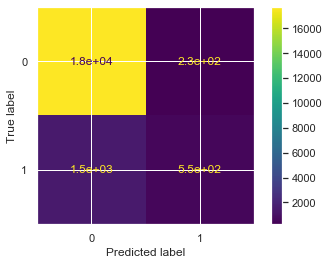

In [13]:
# Test again on X_test
lgp3 = LogisticRegression(penalty='l1', C=0.8, solver='saga', max_iter=200, multi_class='ovr')
lgp3.fit(X_train, y_train)
conf_mat_3 = plot_confusion_matrix(lgp3, X_test, y_test, labels=[0,1])
conf_mat_3

In [14]:
y_pred = lgp3.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.914


In [19]:
scoresNB = []
NB = GaussianNB()
cv = KFold(n_splits=6, random_state=42, shuffle=True)
i=1
for train_index, test_index in cv.split(X_2):
    X_train, X_test, y_train, y_test = X_2[train_index], X_2[test_index], y[train_index], y[test_index]
    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('Fold', i, '-', 'score:', score)
    scoresNB.append(score)
    conf_mat = confusion_matrix(y_test, y_pred, labels=[0,1])
    print('Fold', i, '- confusion matrix:', conf_mat)
    i+=1
print('Average score:', np.mean(scoresNB)*100)

Fold 1 - score: 0.9202315953680926
Fold 1 - confusion matrix: [[29407   503]
 [ 2156  1268]]
Fold 2 - score: 0.9208615827683446
Fold 2 - confusion matrix: [[29453   503]
 [ 2135  1243]]
Fold 3 - score: 0.9222392223922239
Fold 3 - confusion matrix: [[29517   480]
 [ 2112  1224]]
Fold 4 - score: 0.920559205592056
Fold 4 - confusion matrix: [[29524   503]
 [ 2145  1161]]
Fold 5 - score: 0.921609216092161
Fold 5 - confusion matrix: [[29547   491]
 [ 2122  1173]]
Fold 6 - score: 0.9217292172921729
Fold 6 - confusion matrix: [[29489   485]
 [ 2124  1235]]
Average score: 92.12050065841751


In [15]:
scoresrf = []
rf=RandomForestClassifier(n_estimators = 20, criterion = 'entropy', min_samples_split=5, min_samples_leaf=2, 
                          max_features='auto', max_depth=19, bootstrap=True)
cv = KFold(n_splits=10, random_state=42, shuffle=True)
i=1
for train_index, test_index in cv.split(X_2):
    X_train, X_test, y_train, y_test = X_2[train_index], X_2[test_index], y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('Fold', i, '-', 'score:', score)    
    scoresrf.append(score)
    conf_mat = confusion_matrix(y_test, y_pred, labels=[0,1])
    print('Fold', i, '- confusion matrix:', conf_mat)
    i+=1
    
print('Average score:', np.mean(scoresrf)*100, '%')

Fold 1 - score: 0.89865
Fold 1 - confusion matrix: [[17967     0]
 [ 2027     6]]
Fold 2 - score: 0.8968
Fold 2 - confusion matrix: [[17935     1]
 [ 2063     1]]
Fold 3 - score: 0.89785
Fold 3 - confusion matrix: [[17952     1]
 [ 2042     5]]
Fold 4 - score: 0.90235
Fold 4 - confusion matrix: [[18042     0]
 [ 1953     5]]
Fold 5 - score: 0.8982
Fold 5 - confusion matrix: [[17963     1]
 [ 2035     1]]
Fold 6 - score: 0.90145
Fold 6 - confusion matrix: [[18024     2]
 [ 1969     5]]
Fold 7 - score: 0.90115
Fold 7 - confusion matrix: [[18017     0]
 [ 1977     6]]
Fold 8 - score: 0.90245
Fold 8 - confusion matrix: [[18049     0]
 [ 1951     0]]
Fold 9 - score: 0.8989
Fold 9 - confusion matrix: [[17975     0]
 [ 2022     3]]
Fold 10 - score: 0.89865
Fold 10 - confusion matrix: [[17973     0]
 [ 2027     0]]
Average score: 89.96449999999999 %


In [21]:
rf=RandomForestClassifier(n_estimators = 20, criterion = 'entropy', min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=19, bootstrap=True)
rf.fit(X_2, y)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
test_df = pd.read_csv('test.csv')
test_df

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [56]:
X_test = test_df.iloc[:,1:].values
X_test = sc.fit_transform(X_test)

In [74]:
MLP = MLPClassifier(hidden_layer_sizes=(150,30),verbose=True)
MLP.fit(X_2, y)

Iteration 1, loss = 0.25469709
Iteration 2, loss = 0.23295271
Iteration 3, loss = 0.22474450
Iteration 4, loss = 0.21621220
Iteration 5, loss = 0.20716225
Iteration 6, loss = 0.19690295
Iteration 7, loss = 0.18686265
Iteration 8, loss = 0.17786850
Iteration 9, loss = 0.16883004
Iteration 10, loss = 0.16123723
Iteration 11, loss = 0.15404481
Iteration 12, loss = 0.14740481
Iteration 13, loss = 0.14121262
Iteration 14, loss = 0.13605688
Iteration 15, loss = 0.13060360
Iteration 16, loss = 0.12658253
Iteration 17, loss = 0.12164014
Iteration 18, loss = 0.11706261
Iteration 19, loss = 0.11343718
Iteration 20, loss = 0.10952260
Iteration 21, loss = 0.10705513
Iteration 22, loss = 0.10314548
Iteration 23, loss = 0.10015111
Iteration 24, loss = 0.09723843
Iteration 25, loss = 0.09414738
Iteration 26, loss = 0.09199232
Iteration 27, loss = 0.08966681
Iteration 28, loss = 0.08643607
Iteration 29, loss = 0.08546537
Iteration 30, loss = 0.08309393
Iteration 31, loss = 0.08018460
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [75]:
y_pred = MLP.predict(X_test)

In [76]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
collections.Counter(y_pred)

Counter({0: 179625, 1: 20375})

In [78]:
sub_df = pd.DataFrame({"ID_code":test_df["ID_code"].values})
sub_df["target"] = y_pred
sub_df.to_csv("submission.csv", index=False)